<a href="https://colab.research.google.com/github/imsidharthj/Fastai/blob/main/fast_ai_chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [ ]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

In [ ]:
!pip install duckduckgo-search==2.9.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.4 MB/s eta 0:00:00


In [ ]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30): # serach term = liver, abdomen
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image') # itemgot Extracts the image URLs from the search results

In [ ]:
urls = search_images('https://cdn1.vectorstock.com/i/1000x1000/66/00/the-human-liver-anatomy-vector-3566600.jpg', max_images=1)
urls[0]

Searching for 'https://cdn1.vectorstock.com/i/1000x1000/66/00/the-human-liver-anatomy-vector-3566600.jpg'


'https://cdn2.vectorstock.com/i/1000x1000/56/66/human-liver-anatomy-vector-1855666.jpg'

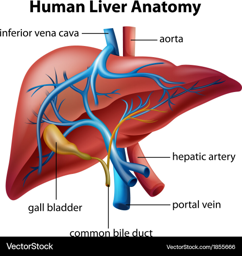

In [ ]:
from fastdownload import download_url
dest = 'liver.jpg' # Sets the destination file name
download_url(urls[0], dest, show_progress=False) # download by fast ai from image's url

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256) # resize image

Searching for 'abdomen'


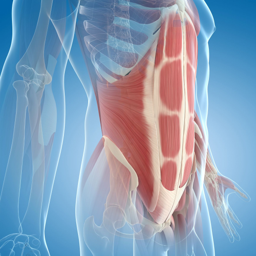

In [ ]:
download_url(search_images('abdomen', max_images=1)[0], 'abdomen.jpg', show_progress=False)
Image.open('https://www.pikpng.com/pngl/m/514-5141625_abdominal-anatomy-gif-png-download-illustration-clipart.png').to_thumb(256,256)

In [ ]:
searches = 'abdomen','liver'
path = Path('/content/sample_data')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause 10 seconds between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} stomach photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} intestine photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'abdomen photo'
Searching for 'abdomen stomach photo'
Searching for 'abdomen intestine photo'
Searching for 'liver photo'
Searching for 'liver stomach photo'
Searching for 'liver intestine photo'


In [ ]:
failed = verify_images(get_image_files(path)) # return list of all image files
failed.map(Path.unlink)
len(failed) # delete broken image inputs

5

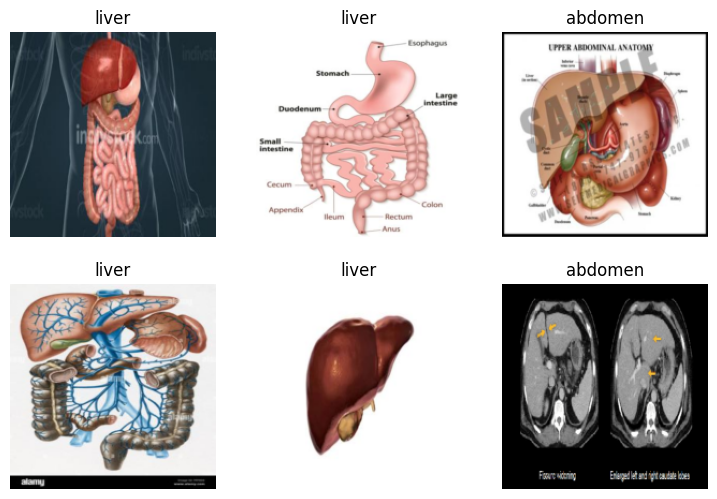

In [ ]:
dls = DataBlock( #
    blocks=(ImageBlock, CategoryBlock), # type of imput, output type category
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # Randomly splits the data into training (80%) and validation (20%) sets.
    get_y=parent_label, # get label from parent folder
    item_tfms=[Resize(192, method='squish')] # resize image crop and squish
).dataloaders(path, bs=32) # batch size, Batch size is the number of samples that are processed together during a single training iteration

dls.show_batch(max_n=6) # show batch of images

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate) # resnet18 neural model by fast model
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.242555,0.666312,0.225806,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.534693,0.352225,0.112903,00:01
1,0.474989,0.399695,0.096774,00:01
2,0.445214,0.364488,0.080645,00:01


In [ ]:
is_bird,_,probs = learn.predict(PILImage.create('liver.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: liver.
Probability it's a bird: 0.0093
